In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def average(data, n):
    """ Moyenne les valeurs de data par paquets de taille n"""
    databis = data[len(data)%n:] #Fais le vecteur pour qu'il soit de longueur multiple de n
    return databis.reshape(len(data)//n, n).mean(axis=1) #les groupes par paquet de n dans une matrice n/3 * 3 et moyenne

In [19]:
a = np.arange(37)
average(a, 3)

array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35.])

In [8]:
def allan_variance_simple(data, n):
    data_moy = average(data, n)
    data_diff = data_moy[1:] - data_moy[:-1] #Remove first and last element of vector before subtraction because unecessary for calculating the variance
    sigma_deux = np.mean(data_diff**2) /2
    return sigma_deux

allan_variance_simple(np.arange(37), 5)

12.5

In [13]:
def allan_variance(data):
    n_max = int(np.log2(len(data)))-1
    Tn = 2**np.arange(n_max) # Axe des temps
    return Tn, np.array([allan_variance_simple(data, n) for n in Tn])

In [14]:
def usual_variance(data):
    n_max = int(np.log2(len(data)))-1
    Tn = 2**np.arange(n_max) #Axe des temps
    return Tn, np.array([np.var(average(data, n)) for n in Tn])

## Exemple

In [9]:
from numpy.random import normal

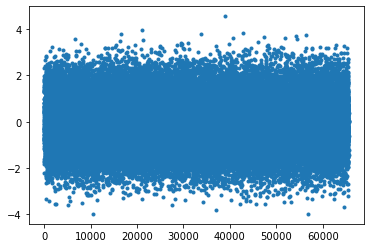

In [10]:
data = normal(size=2**16)
plt.plot(data, '.')

[1.00883704e+00 5.02915483e-01 2.51481263e-01 1.22227675e-01
 6.22007734e-02 3.15130515e-02 1.66581936e-02 8.92923550e-03
 3.96985319e-03 1.88766827e-03 1.08092892e-03 7.49479579e-04
 3.13654182e-04 1.91552802e-04 2.23548200e-04]


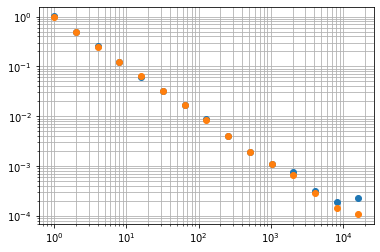

In [31]:
data = normal(size=2**16)
Tn, allan_var = allan_variance(data)
plt.loglog(Tn , allan_var, 'o')
Tn, usual_var = usual_variance(data)
plt.loglog(Tn , usual_var, 'o')
plt.grid(which='both')


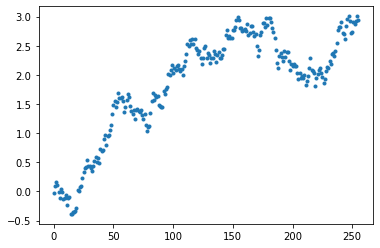

In [18]:
data = 0.1*np.cumsum(np.random.normal(size=2**8)) # Changer jusqua puissance 20 et voir l'effet sur la variance et var d'Allan
plt.plot(data, '.')

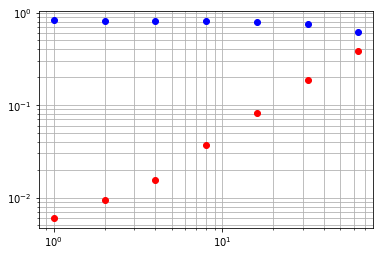

In [19]:
Tn, allan_var = allan_variance(data)
plt.loglog(Tn , allan_var, 'o r') #See the long term fluctuations, at small timescales the means are near
Tn, usual_var = usual_variance(data)
plt.loglog(Tn , usual_var, 'o b') #Does not see a drift compare to the mean (Sum (x_i-mu)^2) on est toujours aussi loin de la moyenne sur toute les échelles de temps)
plt.grid(which='both')


In [78]:
print(allan_var[0])

0.005269180444658188


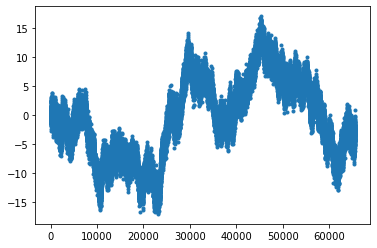

In [20]:
data = 0.1*np.cumsum(np.random.normal(size=2**16)) + normal(size=2**16)

plt.plot(data, '.')

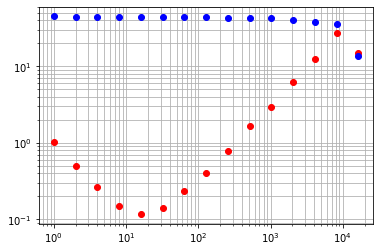

In [21]:
Tn, allan_var = allan_variance(data)
plt.loglog(Tn , allan_var, 'o r')
Tn, usual_var = usual_variance(data)
plt.loglog(Tn , usual_var, 'o b')
plt.grid(which='both')


## Température

In [22]:
data = np.loadtxt('temperature_londres.dat')

Text(0, 0.5, 'Temperature [°C]')

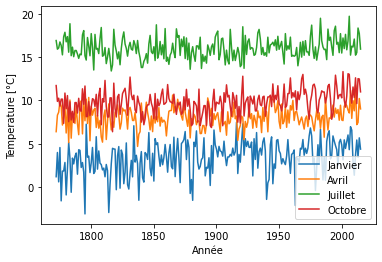

In [23]:
annees = data[:, 0]
janvier = data[:, 1]
avril = data[:, 4]
juillet = data[:, 7]
octobre = data[:, 10]

plt.plot(annees, janvier, label='Janvier')
plt.plot(annees, avril, label='Avril')
plt.plot(annees, juillet, label='Juillet')
plt.plot(annees, octobre, label='Octobre')
plt.legend(loc='best')
plt.xlabel('Année')
plt.ylabel('Temperature [°C]')

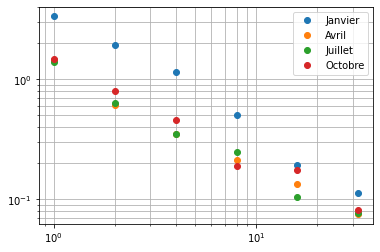

In [24]:
Tn, allan_var = allan_variance(janvier)
plt.loglog(Tn , allan_var, 'o', label='Janvier')
Tn, allan_var = allan_variance(avril)
plt.loglog(Tn , allan_var, 'o', label='Avril')
Tn, allan_var = allan_variance(juillet)
plt.loglog(Tn , allan_var, 'o', label='Juillet')
Tn, allan_var = allan_variance(octobre)
plt.loglog(Tn , allan_var, 'o', label='Octobre')
plt.legend(loc='best')
plt.grid(which='both')

## CAC 40

In [25]:
bourse = np.loadtxt("cac_40.csv", skiprows=4, delimiter=',', usecols=3, converters={3:eval}) #Attention 0 is the first column

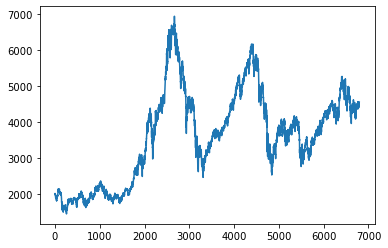

In [26]:
plt.plot(bourse)

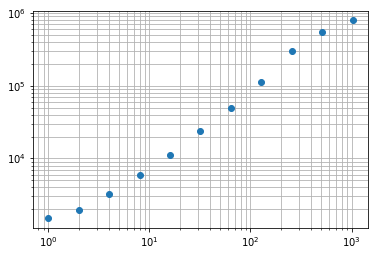

In [27]:
Tn, allan_var = allan_variance(bourse)
plt.loglog(Tn , allan_var, 'o')
plt.grid(which='both')